In [68]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [24]:
mask_path = "/perm/nld4814/code/IMAU-FDM/reference/FGRN055/FGRN055_Masks.nc"
mask = xr.open_dataset(mask_path)

points_path = "/perm/nld4814/code/IMAU-FDM/reference/FGRN055/IN_ll_FGRN055.txt"
points = pd.read_csv(points_path,names=["lon","lat","hrs","imp","time","rlon","rlat"],index_col=False)

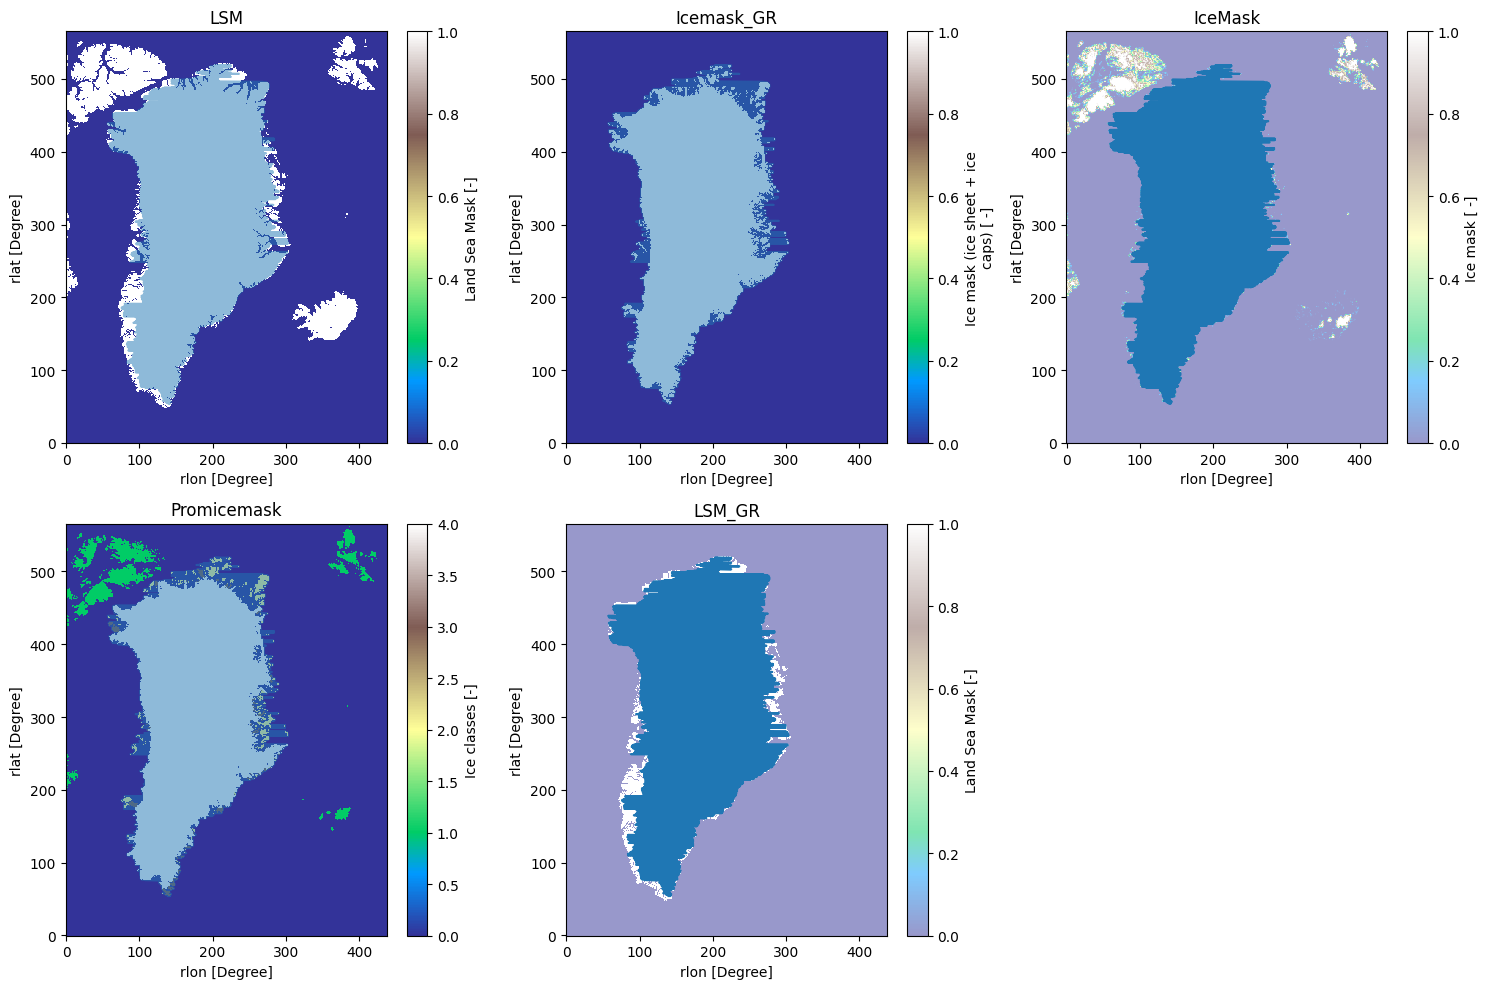

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10),tight_layout=True)

mask['LSM'].plot(ax=axes[0,0],cmap='terrain')
axes[0,0].plot(points.rlat,points.rlon,alpha=0.5)
axes[0,0].set_title('LSM')
#axes[0,0].set_ylim(0,200)
#axes[0,0].set_xlim(0,200)

mask['Icemask_GR'].plot(ax=axes[0,1],cmap='terrain')
axes[0,1].plot(points.rlat,points.rlon,alpha=0.5)
axes[0,1].set_title('Icemask_GR')
#axes[0,1].set_ylim(0,200)
#axes[0,1].set_xlim(0,200)

mask['IceMask'].plot(ax=axes[0,2],cmap='terrain',alpha=0.5)
axes[0,2].plot(points.rlat,points.rlon)
axes[0,2].set_title('IceMask')
#axes[0,2].set_ylim(0,200)
#axes[0,2].set_xlim(0,200)

mask['Promicemask'].plot(ax=axes[1,0],cmap='terrain')
axes[1,0].plot(points.rlat,points.rlon,alpha=0.5)
axes[1,0].set_title('Promicemask')
#axes[1,0].set_ylim(0,200)
#axes[1,0].set_xlim(0,200)

mask['LSM_GR'].plot(ax=axes[1,1],cmap='terrain')
axes[1,1].plot(points.rlat,points.rlon,alpha=0.5)
axes[1,1].set_title('LSM_GR')
#axes[1,1].set_ylim(0,200)
#axes[1,1].set_xlim(0,200)

axes[1,2].set_visible(False)

In [25]:
points

,lon,lat,hrs,imp,time,rlon,rlat
0,-43.5083,60.1478,6,1,0.6,54,140
1,-43.4104,60.1527,6,1,0.6,54,141
2,-43.3125,60.1576,4,1,0.4,54,142
3,-43.7145,60.1874,6,1,0.6,55,138
4,-43.5185,60.1975,5,1,0.5,55,140
...,...,...,...,...,...,...,...
58260,-27.2188,83.3974,3,1,0.3,518,225
58261,-36.6279,83.5493,41,1,4.1,519,203
58262,-28.8418,83.4780,20,1,2.0,519,221
58263,-27.9904,83.4630,38,1,3.8,519,223


In [36]:
# look at tskin_ave

In [37]:
path_ave = "/ec/res4/scratch/nld4814/FGRN055_era055/input/averages/tskin_FGRN055_era055-1939_1940-1970_ave.nc"
tskin_ds = xr.open_dataset(path_ave)

In [70]:
ind1 = 141 #142
ind2 = 54 #55
tskin_target = 265.871

# Find the index where temperature is closest to target_temp
closest_index = abs(tskin_ds["tskin"] - tskin_target).argmin()

# Convert to integer indices
closest_location = np.unravel_index(closest_index.item(), tskin_ds["tskin"].shape)


In [71]:
closest_location

(0, 0, 54, 141)

In [78]:
tskin_ds.isel(rlon=141,rlat=54).tskin

<xarray.DataArray 'tskin' (time: 1, height: 1)> Size: 4B
array([[265.871]], dtype=float32)
Coordinates:
  * height   (height) float64 8B 0.0
    lat      float64 8B ...
    lon      float64 8B ...
    rlat     float64 8B -11.7
    rlon     float64 8B -3.0
  * time     (time) datetime64[ns] 8B 1955-07-02T16:41:36.774193536
Attributes:
    standard_name:  t_skin
    long_name:      Skin temperature
    units:          K
    cell_methods:   time: instantaneous values time: mean
    grid_mapping:   rotated_pole

In [85]:
path_ave = "/ec/res4/scratch/nld3562/FGRN055_era055/input/averages/tskin_FGRN055_era055-1939_1940-1970_ave.nc"
tskin_ds = xr.open_dataset(path_ave)

In [87]:
tskin_ds.isel(rlon=141,rlat=54).tskin

<xarray.DataArray 'tskin' (time: 1, height: 1)> Size: 4B
[1 values with dtype=float32]
Coordinates:
  * height   (height) float64 8B 0.0
    lat      float64 8B ...
    lon      float64 8B ...
    rlat     float64 8B -11.7
    rlon     float64 8B -3.0
  * time     (time) datetime64[ns] 8B 1955-07-02T16:41:36.774193536
Attributes:
    standard_name:  t_skin
    long_name:      Skin temperature
    units:          K
    cell_methods:   time: instantaneous values time: mean
    grid_mapping:   rotated_pole